# Beatriz Balan Fiuza

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [14]:
dataframe = pd.read_csv("DATASET STROKES DATOS LIMPIOS.csv", sep=";")
dataframe = dataframe.dropna()

In [15]:
dataframe.head(10)
dataframe.describe()
dataframe.groupby("Stroke").size()

Stroke
0    3245
1     180
dtype: int64

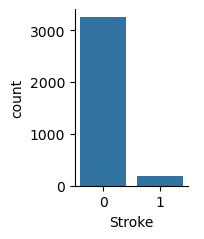

In [16]:
import seaborn as sb
sb.catplot(x = "Stroke",data=dataframe,kind="count",height=2.5, aspect=.8)

In [17]:
label_encoder = LabelEncoder()
for column in dataframe.select_dtypes(include=['object']).columns:
    dataframe[column] = label_encoder.fit_transform(dataframe[column])

In [19]:
y = dataframe["Stroke"]
x = dataframe.drop("Stroke", axis=1)

In [20]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [77]:
df_balanceado = pd.DataFrame(x_resampled, columns=x.columns)
df_balanceado["Stroke"] = y_resampled
df_balanceado.to_csv("DATASET_STROKES_BALANCEADO.csv", sep=";", index=False)